In [1]:
import pandas as pd
import graphlab as gl
import numpy as np
import os,glob
from __future__ import unicode_literals
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.spatial.distance import cosine
color = 'black'
mpl.rcParams['axes.labelcolor'] = color
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['xtick.color'] = color
mpl.rcParams['ytick.color'] = color
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['text.color'] = color
mpl.rcParams['text.usetex'] = False
mpl.rcParams['legend.fontsize'] = 'x-large'
import seaborn
colors = seaborn.color_palette()

2016-04-11 11:54:04,753 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: /tmp/graphlab_server_1460390043.log


This non-commercial license of GraphLab Create is assigned to jlorince@indiana.edu and will expire on April 16, 2016. For commercial licensing options, visit https://dato.com/buy/.


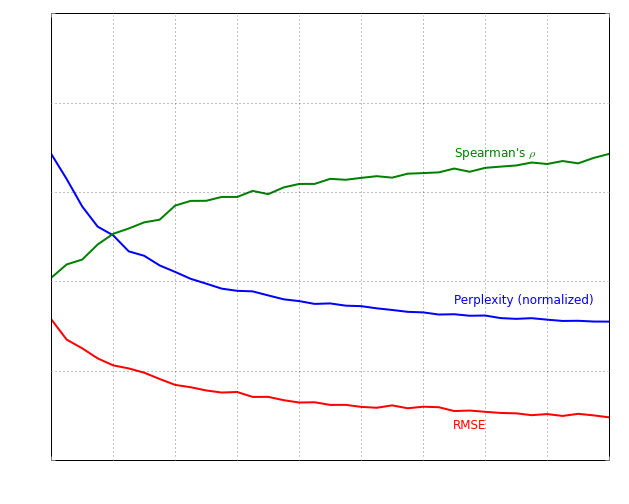

In [3]:
lda_stats = pd.read_table('../GenreModeling/eval_results/basic_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats['perplexity'] = lda_stats['perplexity']/lda_stats['perplexity'].max()
cols = [col for col in lda_stats.columns if ('euclidean' not in col) and ('jsd' not in col) and ('split' not in col)]
ax = lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

handles,labels = ax.get_legend_handles_labels()
# l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
#                        "RMSE (prev)",r"Spearman's $\rho$ (split)", "RMSE (split)"])
# for text in l.get_texts():
#     text.set_color("black")
ax.annotate('Perplexity (normalized)',(150,.35),color='blue',fontsize='large')
ax.annotate(r"Spearman's $\rho$",(150,.68),color='green',fontsize='large')
#ax.annotate(r"Spearman's $\rho$ (split)",(150,.57),color=(0,191/255.,191/255.),fontsize='large')
ax.annotate("RMSE",(150,.07),color='red',fontsize='large')
#ax.annotate("RMSE (split)",(162,.13),color=(192/255.,0,192/255.),fontsize='large')
ax.grid()

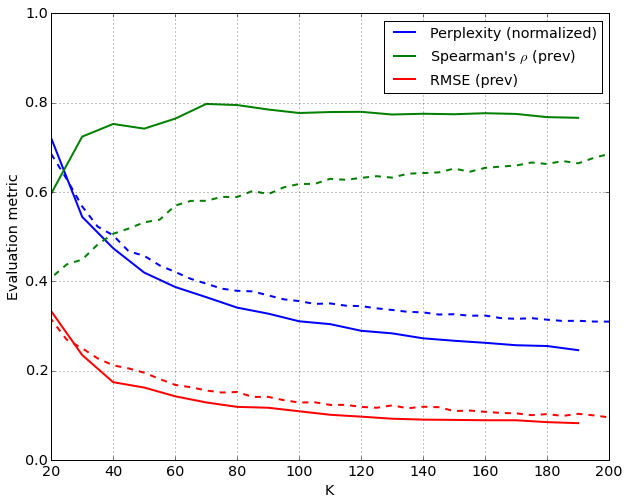

In [6]:
lda_stats_2 = pd.read_table('../GenreModeling/eval_results/artist_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats_2['perplexity'] = lda_stats_2['perplexity']/lda_stats_2['perplexity'].max()
cols = [col for col in lda_stats_2.columns if ('euclidean' not in col) and ('jsd' not in col) and ('split' not in col)]
ax = lda_stats_2[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2,ax=ax,ls='--',color=['blue','green','red'])

handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
                       "RMSE (prev)"])#,r"Spearman's $\rho$ (split)", "RMSE (split)"])
for text in l.get_texts():
    text.set_color("black")
ax.grid()

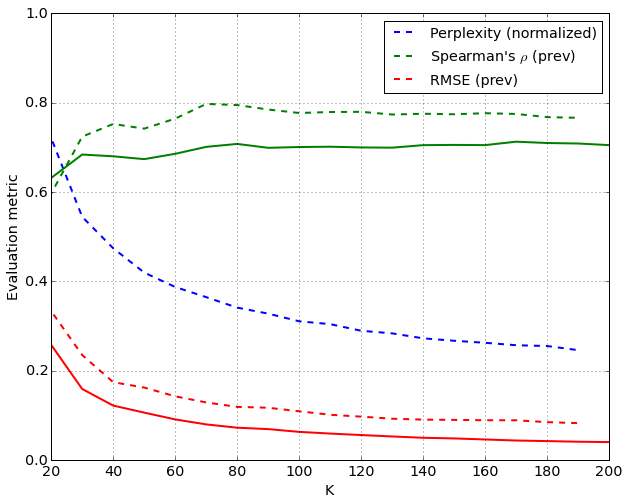

In [93]:
mf_stats = pd.read_table('../GenreModeling/eval_results/basic_mf_final.txt',sep=r"\s*",index_col='K',engine='python')
ax = lda_stats_2[cols].plot(legend=None,xlim=(20,200),lw=2,ls='--')
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of factrs)")

mf_stats.plot(legend=None,xlim=(20,200),lw=2,ax=ax,ls='-',color=['green','red'])

handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
                       "RMSE (prev)"])#,r"Spearman's $\rho$ (split)", "RMSE (split)"])
for text in l.get_texts():
    text.set_color("black")
ax.grid()

In [530]:
lda_summary = pd.read_table('../GenreModeling/eval_results/knn_lda.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
mf_summary = pd.read_table('../GenreModeling/eval_results/knn_mf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
nmf_summary = pd.read_table('../GenreModeling/eval_results/knn_nmf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
lda_summary_artists = pd.read_table('../GenreModeling/eval_results/knn_lda_artists.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])

In [34]:
if False:
    for d in [lda_summary,mf_summary,lda_summary_artists]:
        fig,axes = plt.subplots(2,3,figsize=(14,8))
        flat = axes.flat
        for l in ['all','possible','25','50','100','150']:
            data=d.xs(['fm',l],level=['source','method'])['median'].unstack()
            if len(data)>0:
                ax = flat.next()
                data.plot(title=l,ax=ax,ylim=[0,.5],lw=2,)
                l = ax.get_legend()
                for text in l.get_texts():
                    text.set_color("black")
                t = l.get_title()
                t.set_text("KNN")
                t.set_color("black")
                t.set_fontsize("x-large")
                ax.grid()
                ax.set_ylabel("Median proportion overlap")
                ax.set_xlabel("K (number of topics)")

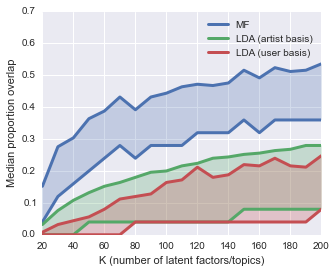

In [683]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

mf_plot = nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
mf_plot[25].plot(ax=ax,ylim=(0,1),lw=3,c=colors[0],label='MF')#,color=['blue','green','red','cyan','magenta','yellow'])
mf_plot[250].plot(ax=ax,lw=3,c=colors[0])
ax.fill_between(np.arange(20,201,10),mf_plot[25],mf_plot[250],color=colors[0],alpha=0.25)

# nmf_plot = nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
# nmf_plot[25].plot(ax=ax,ylim=(0,1),lw=3,c='cyan',label='MF')#,color=['blue','green','red','cyan','magenta','yellow'])
# nmf_plot[250].plot(ax=ax,lw=3,c='cyan')
#ax.fill_between(np.arange(20,201,10),nmf_plot[25],nmf_plot[250],color='cyan',alpha=0.25)

lda_a_plot = lda_summary_artists.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
lda_a_plot[25].plot(ax=ax,lw=3,c=colors[1],label='LDA (artist basis)')
lda_a_plot[250].plot(ax=ax,lw=3,c=colors[1])
ax.fill_between(np.arange(20,201,10),lda_a_plot[25],lda_a_plot[250],color=colors[1],alpha=0.25)

lda_plot = lda_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
lda_plot[25].plot(ax=ax,lw=3,c=colors[2],label='LDA (user basis)')
lda_plot[250].plot(ax=ax,lw=3,c=colors[2])
ax.fill_between(np.arange(20,201,10),lda_plot[25],lda_plot[250],color=colors[2],alpha=0.25)

#nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1),lw=1,legend=False,ls='--',ax=ax,color=['blue','green','red','cyan','magenta','yellow'])
# l = ax.get_legend()
# for text in l.get_texts():
#     text.set_color("black")
# t = l.get_title()
# t.set_text("KNN")
t.set_color("black")
t.set_fontsize("x-large")
# ax.annotate("MF model",(45,0.88),color='k',fontsize='x-large')
# ax.annotate("LDA model",(60,0.15),color='k',fontsize='x-large')
ax.set_ylabel("Median proportion overlap")
ax.set_xlim(20,200)
ax.set_ylim(0,0.7)
ax.set_xlabel("K (number of latent factors/topics)")
handles,labels = ax.get_legend_handles_labels()
l = ax.legend([handles[0],handles[2],handles[4]],[labels[0],labels[2],labels[4]],loc='upper right')

#ax.grid()
fig.savefig('/Users/jaredlorince/Desktop/stability.pdf',bbox_inches='tight')

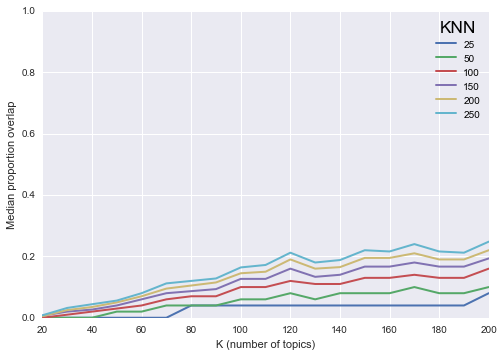

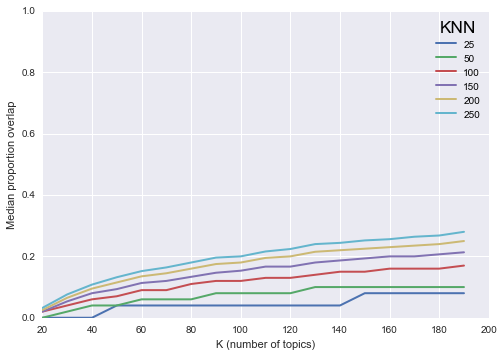

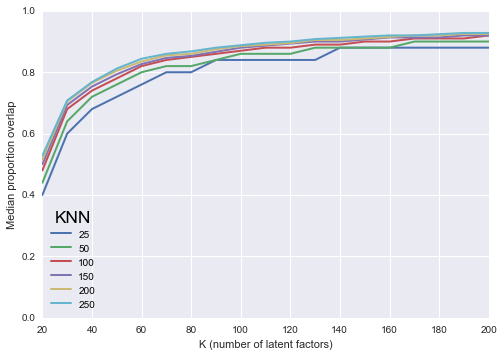

In [60]:
# ax = lda_summary.xs('split',level='source').reset_index().pivot(index='k',
#                         columns='topN',values='median').plot(ylim=(0,1),lw=2)
# l = ax.get_legend()
# for text in l.get_texts():
#     text.set_color("black")
# t = l.get_title()
# t.set_text("KNN")
# t.set_color("black")
# t.set_fontsize("x-large")
# ax.set_ylabel("Median proportion overlap")
# ax.set_xlabel("K (number of topics)")
# ax.set_title('"split" method')
# ax.set_xticks(np.arange(20,201,20))
# ax.grid(which='both')

for i,d in enumerate((lda_summary,lda_summary_artists,mf_summary)):
    ax=d.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1),lw=2)
    l = ax.get_legend()
    for text in l.get_texts():
        text.set_color("black")
    t = l.get_title()
    t.set_text("KNN")
    t.set_color("black")
    t.set_fontsize("x-large")
    ax.set_ylabel("Median proportion overlap")
    if i ==2:
        ax.set_xlabel("K (number of latent factors)")
    else:
        ax.set_xlabel("K (number of topics)")
#    ax.set_title('"prev" method')
    #ax.grid(which='both')
    ax.set_xlim(20,200)

In [259]:
ax.fill_between?

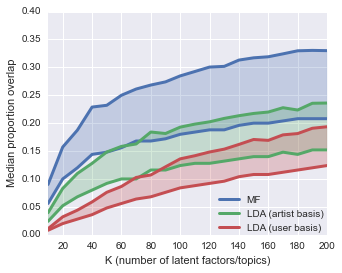

In [684]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

mf_poss = nmf_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
mf_poss.plot(ax=ax,lw=3,label='MF',color=colors[0],ls='-')
mf_cons = nmf_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
mf_cons.plot(ax=ax,lw=3,color=colors[0],ls='-')
ax.fill_between(np.arange(10,201,10),mf_cons,mf_poss,color=colors[0],alpha=0.25)

lda_a_cons = lda_summary_artists.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
lda_a_cons.plot(ax=ax,lw=3,label='LDA (artist basis)',c=colors[1],ls='-')
lda_a_poss = lda_summary_artists.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
lda_a_poss.plot(ax=ax,lw=3,c=colors[1],ls='-')
ax.fill_between(np.arange(10,201,10),lda_a_cons,lda_a_poss,color=colors[1],alpha=0.25)

lda_cons = lda_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
lda_cons.plot(ax=ax,lw=3,label='LDA (user basis)',ls='-',c=colors[2])
lda_poss = lda_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
lda_poss.plot(ax=ax,lw=3,ls='-',c=colors[2])
ax.fill_between(np.arange(10,201,10),lda_cons,lda_poss,color=colors[2],alpha=0.25)





# nmf_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
#                                                                             ax=ax,lw=2,label='Conservative',color='cyan',ls='--')
# nmf_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
#                                                                             ax=ax,lw=2,label='Possible overlap',color='cyan',ls='--')


ax.set_ylim(0,0.4)
handles,labels = ax.get_legend_handles_labels()
l = ax.legend([handles[0],handles[2],handles[4]],[labels[0],labels[2],labels[4]],loc=(0.6,-0.01))#'lower right')
#for text in l.get_texts():
#    text.set_color("black")
 
ax.set_xticks(np.arange(20,201,20))
#ax.grid()
ax.set_xlabel("K (number of latent factors/topics)")
ax.set_ylabel("Median proportion overlap")

# ax.annotate("LDA (user basis)",(80,0.035),color=colors[2],fontsize='x-large')
# ax.annotate("MF model",(41,0.32),color=colors[0],fontsize='x-large')
# ax.annotate("LDA (artist basis)",(35,0.2),color=colors[1],fontsize='x-large')

fig.savefig('/Users/jaredlorince/Desktop/fm_alignment.pdf',bbox_inches='tight')


In [377]:
ax.get_xlim()

(10.0, 200.0)

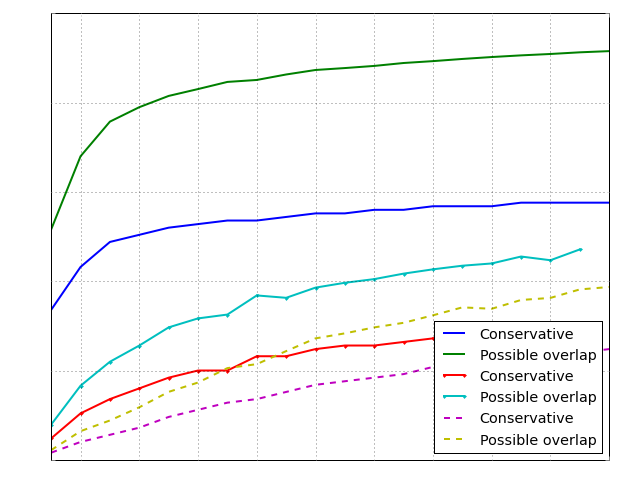

In [12]:
fig,ax = plt.subplots(1,1)
mf_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Conservative')
mf_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Possible overlap')

lda_summary_artists.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Conservative',marker='.')
lda_summary_artists.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Possible overlap',marker='.')

lda_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Conservative',ls='--')
lda_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Possible overlap',ls='--')


ax.set_ylim(0,0.5)
l = ax.legend(loc='lower right')
for text in l.get_texts():
    text.set_color("black")
ax.set_xticks(np.arange(20,201,20))
ax.grid()
ax.set_xlabel("K (number of topics)")
ax.set_ylabel("Median proportion overlap")

In [29]:
artist_data = pd.read_table('../GenreModeling/data/artist_data',header=None,
                            names=['artist_id','artist_name','scrobbles','listeners'])

playcounts = pd.Series([int(line.strip()) for line in open('../GenreModeling/data/playcounts')])
playcounts.sort(ascending=False)
playcounts = playcounts.reset_index(drop=True)

In [5]:
artist_data.head()

,artist_id,artist_name,scrobbles,listeners
0,1,slipknot,5168441,45909
1,5,ultraspank,21797,1262
2,7,finger+eleven,452415,17830
3,10,strata,87516,3022
4,12,%c3%9cnloco,71511,6095


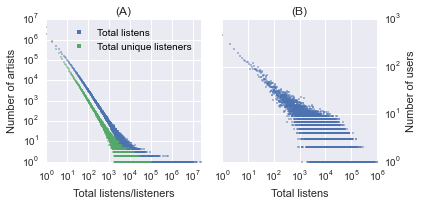

In [51]:
fig,axes = plt.subplots(1,2,figsize=(6,3))
ax = axes[0]
artist_data['scrobbles'].value_counts().sort_index().plot(marker='.',ax=ax,
                                                          ls='',loglog=True,label='Total listens',ms=3)
artist_data['listeners'].value_counts().sort_index().plot(marker='.',
                                                          ls='',loglog=True,ax=ax,label='Total unique listeners',ms=3)
ax.set_xlabel('Total listens/listeners')
ax.set_ylabel('Number of artists')
#ax.axvline(100,c='green',ls='--')
#ax.axvline(1000,c='blue',ls='--')
ax.set_title(r"(A)")
l = ax.legend(markerscale=3)
for text in l.get_texts():
    text.set_color("black")
#ax.grid()  

ax = axes[1]
playcounts.value_counts().sort_index().plot(marker='.',ls='',loglog=True,ax=ax,ms=3)
ax.set_xlabel('Total listens')
ax.set_title("(B)")
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel('Number of users')

plt.tight_layout()
fig.savefig('/Users/jaredlorince/Desktop/freq_dists.png',dpi=400,bbox_inches='tight')

In [17]:
playcounts = pd.Series([int(line.strip()) for line in open('../GenreModeling/data/playcounts')])
playcounts.sort(ascending=False)
playcounts = playcounts.reset_index(drop=True)

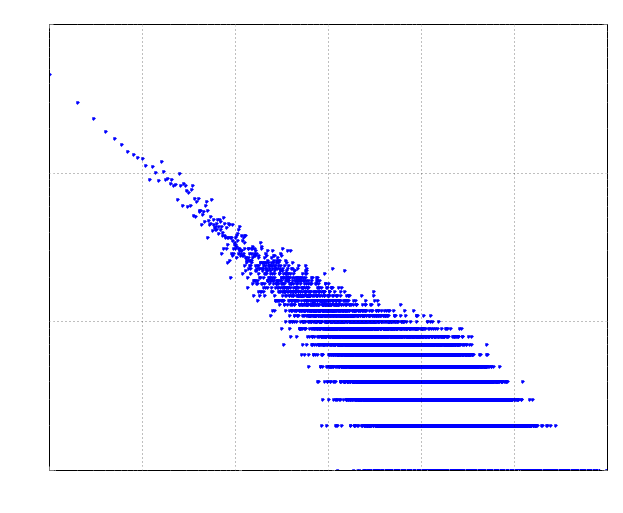

In [46]:
ax = playcounts.value_counts().sort_index().plot(marker='.',ls='',loglog=True)
ax.set_xlabel('Total scrobbles')
ax.set_ylabel('Number of users')
ax.set_title(r"\textbf{User} scrobble frequency distribution")
ax.grid()

In [95]:
artist_data_trimmmed = artist_data[(artist_data['scrobbles']>=1000)&(artist_data['listeners']>=100)]
print len(artist_data),len(artist_data_trimmmed),float(len(artist_data_trimmmed))/len(artist_data)
print artist_data['scrobbles'].sum(),artist_data_trimmmed['scrobbles'].sum(),4430237213./4691766834

7333724 112312 0.0153144568844
4691766834 4430237213 0.944257754008


4684838731

In [14]:
import graphlab as gl
#docs = gl.SArray("../GenreModeling/data/doc_array/")

A newer version of GraphLab Create (v1.8.4) is available! Your current version is v1.5.2.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [102]:
#doc_sums = docs.apply(lambda x: sum(x.values()))
4423111456.0 / 4691766834

0.9427389749948516

In [103]:
print len(docs),len(playcounts)

145148 167244


In [49]:
topic_model = gl.load_model('../testData/lda_model_100/')
TOP_TERMS=20
top_terms_by_topic = topic_model.get_topics(num_words=TOP_TERMS,output_type='topic_probabilities').to_dataframe()
top_terms_by_topic['Rank'] = (-1*top_terms_by_topic).groupby('topic')['score'].transform(np.argsort)
top_terms_by_topic['New_str'] = top_terms_by_topic['word'] + top_terms_by_topic['score'].apply(' ({0:.3f})'.format)
new = top_terms_by_topic.sort(columns=['Rank', 'score'])[['New_str', 'topic','Rank']]
final = new.pivot(index='Rank', values='New_str', columns='topic')

In [94]:
from urllib import unquote_plus
for idx in range(100):
    break
    print ', '.join([unquote_plus(a).title() for a in list(final[idx][:5])])

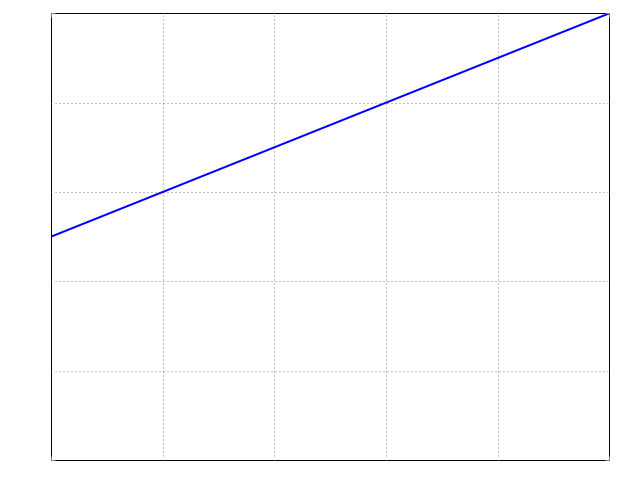

In [404]:
x = np.arange(0,1.1,0.1)
fig,ax = plt.subplots(1,1)
ax.plot(0.5+0.5*x,lw=2)
ax.set_xlabel("|dist(A,B) - dist(A,C)|")
ax.set_ylabel("Proportion human/model agreement")
ax.set_ylim(0,1)
ax.set_xticklabels(np.arange(0,1.01,0.2))
ax.grid(which='both')
#ax.set_yticklabels(np.arange(0,1.01,0.1))

In [674]:
from scipy.stats import linregress
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Binomial
from sklearn.metrics import auc
from scipy.stats import spearmanr
for ax_idx,d in enumerate(('nmf','lda_users','lda_artists')): # mf
    best = 0
    best_k = None
    for i,k in enumerate(np.arange(10,141,10)):
        eval_data = process(k,d)
        #overall = (eval_data['agree'] * eval_data['dist_dif']).sum()
        #print overall,k
        slope, intercept, r_value, p_value, std_err = linregress(eval_data['luce'],eval_data['agree'])
        rmse = np.sqrt(((eval_data['agree'] - eval_data['luce'])**2).sum() / len(eval_data))
        #lm = GLM(eval_data['agree'], eval_data['luce'], family=Binomial()).fit()
        print k,rmse,slope, intercept, r_value, p_value, std_err
        #slope_dev = abs(1-slope)
        #x_vals = np.arange(0,1.01,0.01)
        #print k,the_auc,r_value

        if r_value>best:
            best_k = k
            best = r_value

        
    print d,best,best_k
#    print d,best_linear,best_k_linear
#    print d,best_intercept,best_k_intercept
    


10 0.44364320956 0.97070524329 0.0728303899253 0.202796201127 1.20973405584e-22 0.0980754284439
20 0.443102013634 0.975303251427 0.0415630827201 0.220789238285 1.22616646047e-26 0.0901491296484
30 0.444867798996 0.849191217342 0.116358262637 0.194738679759 5.67477695535e-21 0.0894973351863
40 0.441734969398 0.842603958171 0.123932786387 0.196908008804 2.04673687742e-21 0.087785967235
50 0.44096741901 0.917795330601 0.0631069065642 0.213174094898 6.66097467383e-25 0.0880165325659
60 0.437779000309 0.979495824989 0.0236260855016 0.232303968227 2.18361412306e-29 0.0858126833026
70 0.440414762904 0.860928465824 0.0946281639322 0.206275691176 2.18116102573e-23 0.0854533505135
80 0.439995089177 0.904396474514 0.0654775374879 0.215042600165 2.53464549815e-25 0.0859419304502
90 0.438600814905 0.924832871612 0.050904771972 0.222632697108 4.55643077556e-27 0.0847397928525
100 0.438901562974 0.997931573359 -0.00911935232661 0.243543196211 3.21518783691e-32 0.083157077288
110 0.439936409181 0.9650

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:59: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [615]:
from statsmodels.discrete.discrete_model import Logit
x = Logit(eval_data['agree'], eval_data['luce']).fit()
lm = GLM(eval_data['agree'], eval_data['luce'], family=Binomial()).fit()
print x.summary()
print lm.summary()

Optimization terminated successfully.
         Current function value: 0.616497
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  agree   No. Observations:                 2286
Model:                          Logit   Df Residuals:                     2285
Method:                           MLE   Df Model:                            0
Date:                Fri, 15 Apr 2016   Pseudo R-squ.:                 0.02567
Time:                        09:49:26   Log-Likelihood:                -1409.3
converged:                       True   LL-Null:                       -1446.4
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
luce           1.1354      0.066     17.147      0.000         1.006     1.265
                 Generalized 

In [653]:
eval_data['agree'].value_counts()

1.0    1406
0.0     656
0.5     224
dtype: int64

Optimization terminated successfully.
         Current function value: 0.583245
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  agree   No. Observations:                 2062
Model:                          Logit   Df Residuals:                     2060
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Apr 2016   Pseudo R-squ.:                 0.06749
Time:                        10:13:39   Log-Likelihood:                -1202.7
converged:                       True   LL-Null:                       -1289.7
                                        LLR p-value:                 9.487e-40
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.6416      0.276     -9.573      0.000        -3.182    -2.101
x1             5.1568      0.

array([[ 1.        ,  0.59277108],
       [ 1.        ,  0.95009618],
       [ 1.        ,  0.99264821],
       ..., 
       [ 1.        ,  0.56369921],
       [ 1.        ,  0.56871379],
       [ 1.        ,  0.80297972]])

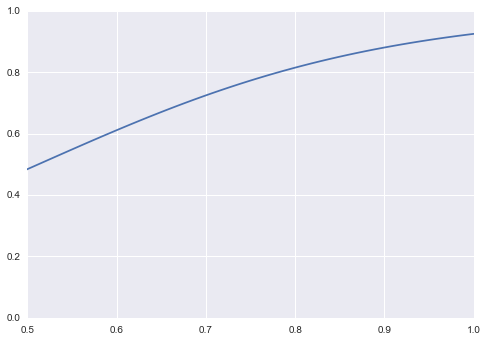

In [655]:
test_x = np.arange(0.5,1.0,0.01)
#1/(1+exp(-(-4.0777+1.5046* Hours)))
fit,ax =plt.subplots(1,1)
ax.set_ylim(0.0,1.0)
ax.set_xlim(0.5,1.)
grid = np.linspace(0,1, 100)
eval_data = eval_data[eval_data['agree']!=0.5]
X, y = np.c_[np.ones(len(eval_data)), eval_data['luce']], eval_data['agree']
grid = np.c_[np.ones(len(grid)), grid]
#lm=GLM(y, X, family=Binomial()).fit()
m=Logit(y,X).fit()
print m.summary()
ax.plot(grid[:,1],m.predict(grid))
X

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


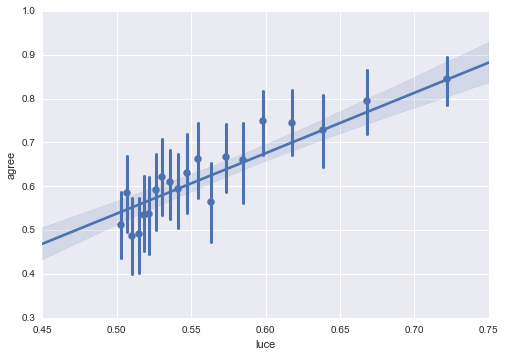

In [827]:
fig,ax = plt.subplots(1,1)
eval_data = process(140,'mf')
#seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ci=None,ax=ax)
seaborn.regplot(x='luce',y='agree',data=eval_data,ax=ax,scatter=True,logistic=False,x_bins=20)#,ci=None)


In [820]:
files = glob.glob('../GenreModeling/manual_eval/results/*_log')
artist_ids = {}
with open('../GenreModeling/data/vocab_idx') as fin:
    for line in fin:
        line = line.strip().split()
        artist_ids[int(line[1])] = line[0]
df_list = []
for f in files:
    df = pd.read_table(f,header=None,names=['ts','artist_a','artist_b','artist_c','ab_dist','bc_dist','agree'])
    iden = f.split('/')[-1].split('_')[0]
    df['iden'] = iden
    df_list.append(df)
raw_eval_data = pd.concat(df_list).drop_duplicates().dropna()
#print eval_data['iden'].value_counts()
#print eval_data['agree'].value_counts()
raw_eval_data = raw_eval_data[raw_eval_data['agree']!=-1]
raw_eval_data['artist_name_a'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_a']),axis=1)
raw_eval_data['artist_name_b'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_b']),axis=1)
raw_eval_data['artist_name_c'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_c']),axis=1)
raw_eval_data['agree'] = raw_eval_data['agree'].apply(lambda x: 0.5 if x==2 else x)
def response_parse(row):
    if row['agree'] == 0.5:
        return '='
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['agree']==1.:
                response = 'c'
            elif row['agree'] == 0.:
                response = 'b'
        elif (row['ab_dist']<row['bc_dist']):
            if row['agree']==1.:
                response = 'b'
            elif row['agree'] == 0.:
                response = 'c'
    return response

def agree_parse(row):
    if row['response'] == '=':
        return 0.5
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['response']=='c':
                return 1
            elif row['response'] == 'b':
                return 0
        elif (row['ab_dist']<row['bc_dist']):
            if row['response']=='b':
                return 1
            elif row['response'] == 'c':
                return 0
            
raw_eval_data['response'] = raw_eval_data.apply(response_parse,axis=1)

from scipy.stats import entropy
from numpy.linalg import norm
def process(k,d,method='cosine'):
    processed = raw_eval_data.copy()
    artist_features = np.load("../GenreModeling/data/features/{}/features_{}.npy".format(d,k))
    if method=='jsd':
        def calc_dist(artist_a,artist_b):
            P = artist_features[artist_a]
            Q = artist_features[artist_b]
            _P = P / norm(P, ord=1)
            _Q = Q / norm(Q, ord=1)
            _M = 0.5 * (_P + _Q)
            return np.sqrt(0.5 * (entropy(_P, _M) + entropy(_Q, _M)))
    else:
        def calc_dist(artist_a,artist_b):
            return cosine(artist_features[artist_a],artist_features[artist_b])            
    processed['ab_dist'] = processed.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
    processed['bc_dist'] = processed.apply(lambda row: calc_dist(row['artist_b'],row['artist_c']),axis=1)
    processed['dist_dif'] = np.clip(np.abs(processed['ab_dist']-processed['bc_dist']),0,1)
    processed['agree'] = processed.apply(agree_parse,axis=1)
    def luce(row):
        ab_dist = row['ab_dist']
        bc_dist = row['bc_dist']
        result = max([ab_dist,bc_dist]) / (ab_dist+bc_dist)
        return result
                                          
    processed['luce'] = processed.apply(luce,axis=1)
    return processed

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:58: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


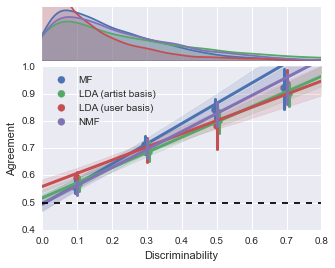

In [486]:
fig = plt.figure(figsize=(5,4)) 
gs = mpl.gridspec.GridSpec(2,1, height_ratios=[1,3],hspace=0.05) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.set_yticks([])
ax0.set_xticks(np.arange(0.0,0.81,0.1))
ax0.set_xlim(0,0.8)
ax0.set_ylim(0,3.5)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

bins = bins = np.array([.1,.3,.5,.7])

# for k in xrange(10,201,10):
#     process(k,'mf')
#     seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[0],line_kws={'lw':0.5,'ls':'-','alpha':0.25},scatter=False,ci=None)#, ci=None)
#     process(k,'lda_artists')
#     seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[1],line_kws={'lw':0.5,'ls':'-','alpha':0.25},scatter=False,ci=None)#, ci=None)
#     process(k,'lda_users')
#     seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[2],line_kws={'lw':0.5,'ls':'-','alpha':0.25},scatter=False,ci=None)#, ci=None)

eval_data = process(60,'mf')
seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[0],line_kws={'lw':3,'ls':'-'},x_bins=bins-.006,label='MF')#,ci=None)
seaborn.kdeplot(eval_data['dist_dif'],ax=ax0,color=colors[0],shade=True,legend=None)

eval_data = process(120,'lda_artists')
seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[1],line_kws={'lw':3,'ls':'-'},x_bins=bins+0.006,label='LDA (artist basis)')#,ci=None)
seaborn.kdeplot(eval_data['dist_dif'],ax=ax0,color=colors[1],shade=True,legend=None)

eval_data = process(100,'lda_users')
seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[2],line_kws={'lw':3,'ls':'-'},x_bins=bins,label='LDA (user basis)')#, ci=None)
seaborn.kdeplot(eval_data['dist_dif'],ax=ax0,color=colors[2],shade=True,legend=None)

eval_data = process(20,'nmf')
seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[3],line_kws={'lw':3,'ls':'-'},x_bins=bins,label='NMF')#, ci=None)
seaborn.kdeplot(eval_data['dist_dif'],ax=ax0,color=colors[3],shade=True,legend=None)






#ax1.set_xlabel("|dist(A,B) - dist(A,C)|")
ax1.set_xlabel("Discriminability")
ax1.set_ylabel("Agreement")
ax1.set_ylim(0.4,1.)
ax1.set_xlim(0,0.8)
ax1.axhline(0.5,ls='--',c='k')
ax1.legend(loc='upper left')
#plt.tight_layout()
fig.savefig('/Users/jaredlorince/Desktop/human_eval_linear3.pdf',bbox_inches='tight')


/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


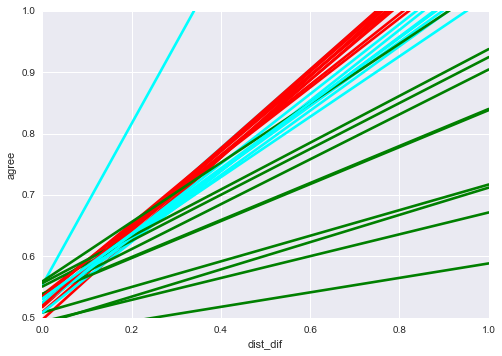

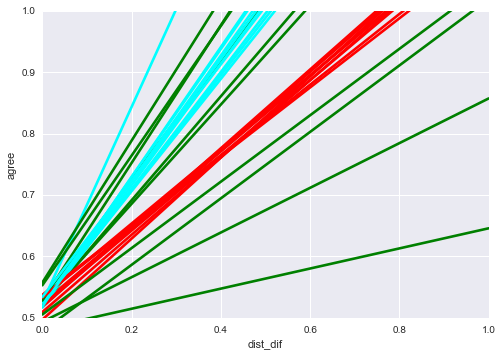

In [722]:
logit = False
dv='dist_dif'
for method in ('cosine','jsd'):
    fig,ax = plt.subplots(1,1)
    for k in xrange(10,101,10):
        eval_data = process(k,'nmf')
        seaborn.regplot(x=dv,y='agree',data=eval_data,logistic=logit,ax=ax,color='red',scatter=False,ci=None,label='nmf')#, ci=None)
#         eval_data = process(k,'mf')
#         seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax,color='blue',scatter=False,ci=None,label='mf')#, ci=None)
        eval_data = process(k,'lda_users',method=method)
        seaborn.regplot(x=dv,y='agree',data=eval_data,logistic=logit,ax=ax,color='green',scatter=False,ci=None,label='lda_users')#, ci=None)
        eval_data = process(k,'lda_artists',method=method)
        seaborn.regplot(x=dv,y='agree',data=eval_data,logistic=logit,ax=ax,color='cyan',scatter=False,ci=None,label='lda_artists')#, ci=None)
    ax.set_ylim(0.5,1.0)
    #ax.set_xlim(0.5,1.)
# line_kws={'lw':0.5,'ls':'-','alpha':0.25}    
#ax.legend()
# process(120,'mf')
# seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=False,ax=ax,color=colors[0],line_kws={'lw':3,'ls':'-'},x_bins=bins-.006,label='MF')#,ci=None)
# seaborn.kdeplot(eval_data['dist_dif'],ax=ax0,color=colors[0],shade=True,legend=None)
# ax.set_xlim(0,0.8)|

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


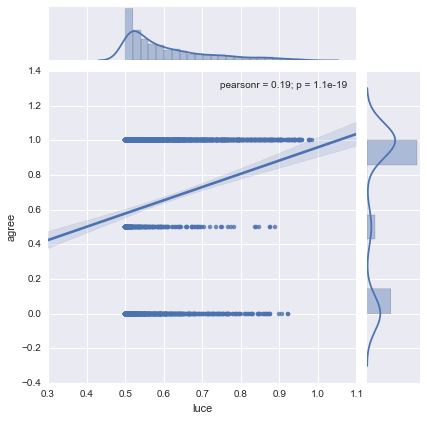

In [828]:
# eval_data = process(150,'lda_artists','jsd')
# seaborn.jointplot(x='luce',y='agree',data=eval_data,kind='regplot')
eval_data = process(150,'lda_artists','cosine')
seaborn.jointplot(x='luce',y='agree',data=eval_data,kind='regplot')

In [559]:
y=[0,1]*100

In [582]:
#0.97070524329 0.0728303899253
x=(.97070524329*eval_data['agree'])+0.0728303899253
print linregress(eval_data['luce'],x)
print linregress(eval_data['luce'],eval_data['agree'])
print np.sqrt(((x - eval_data['luce'])**2).sum() / len(eval_data))
print np.sqrt(((eval_data['agree'] - eval_data['luce'])**2).sum() / len(eval_data))

(0.86693034136004388, 0.095855249560767519, 0.28246054384547514, 3.4007411207640976e-43, 0.061606035528140118)
(0.89309329207058463, 0.023719723154507322, 0.28246054384547525, 3.400741120763757e-43, 0.063465234121265771)
0.417306617248
0.432891330542


In [703]:
x = process(100,'lda_artists',method='cosine')
y = process(100,'lda_artists',method='jsd')

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [708]:
from scipy.stats import spearmanr,pearsonr
print spearmanr(x['ab_dist'],y['ab_dist'])
print pearsonr(x['ab_dist'],y['ab_dist'])

(0.95960375251612284, 0.0)
(0.95133015372541851, 0.0)


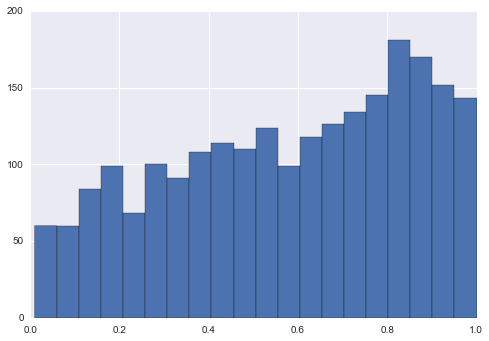

In [712]:
x['ab_dist'].hist(bins=20)

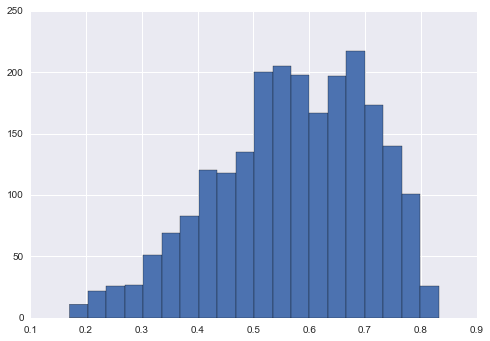

In [713]:
y['ab_dist'].hist(bins=20)

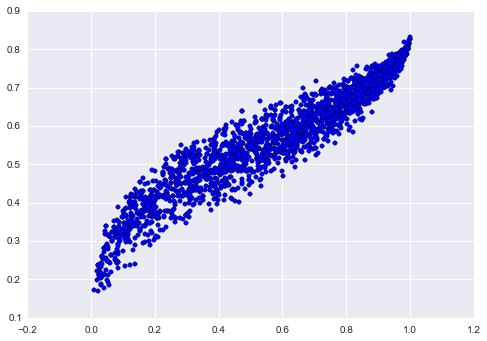

In [719]:
plt.scatter(x=x['ab_dist'],y=y['ab_dist'])

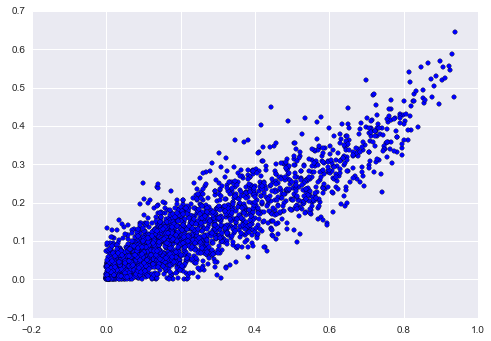

In [726]:
plt.scatter(x=x['dist_dif'],y=y['dist_dif'])

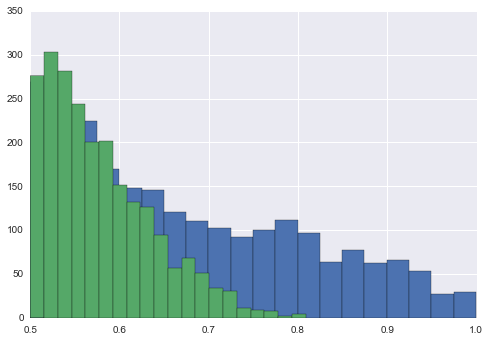

In [729]:
x['luce'].hist(bins=20)
y['luce'].hist(bins=20)

In [821]:
eval_data  = process(100,'nmf')
test = eval_data[(eval_data['dist_dif']<0.15)]
test.shape

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(1167, 14)

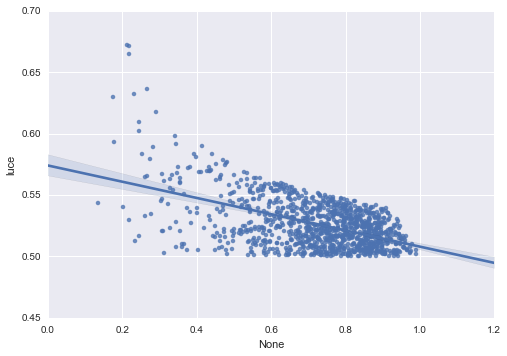

In [822]:
#seaborn.regplot(data=test,x='luce_exp',y='agree')
#test.sort('luce',ascending=False)
seaborn.regplot(data=test,x=(test['ab_dist']+test['bc_dist'])/2.,y='luce')

In [848]:
def calc_prob(row):
    if row['agree']==1:
        return row['luce']
    else:
        return 1 - row['luce']
np.log(eval_data.apply(calc_prob,axis=1)).sum()


-1472.2385595902415

In [896]:
from np import exp,array,log,exp
x = np.array([0.5,0.5,0.4])
y = np.array([0.5,0.3,0.2])


In [897]:
x.prod()/y.prod()

3.3333333333333335

In [902]:
np.exp(np.log(x).sum()-np.log(y).sum())

3.3333333333333344

In [874]:
lm = GLM(x,y).fit()

In [875]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                    3
Model:                            GLM   Df Residuals:                        2
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                 0.0268421052632
Method:                          IRLS   Log-Likelihood:                 1.7781
Date:                Sun, 17 Apr 2016   Deviance:                     0.053684
Time:                        15:08:24   Pearson chi2:                   0.0537
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2632      0.266      4.753      0.000         0.742     1.784
==============================================================================
"""